# Done By Yazeed Hamdan - Second Project

---

# Introduction

In this project, I will practice real-world data wrangling using two related movie datasets. In many cases, real-world data is not ready for analysis right away. It often includes problems such as missing values, incorrect formats, duplicate records, or messy structures. These issues can make it difficult to gain accurate insights, which is why data wrangling is such an important skill.

This project focuses on understanding the full data wrangling process — from gathering and assessing data, to cleaning and preparing it for analysis. I will work with two datasets that are related to movies. One dataset includes general movie information like budget, revenue, and ratings. The other dataset contains a list of movies and TV shows that are available on Netflix. By cleaning and combining these datasets, I will be able to answer an interesting and practical question.

## Project Goal

The goal of this project is to compare movies that are available on Netflix to those that are not, and explore whether there are any differences in popularity and financial performance. Popularity will be measured using the average user ratings, and financial success will be measured using the revenue earned by each movie.

By the end of this project, I hope to discover whether Netflix tends to host higher-rated or more financially successful movies, or whether there is no major difference between Netflix and non-Netflix films. This analysis can give us insight into the kind of content that Netflix offers and how it compares to the wider movie industry.

## Steps
- Gather two related datasets from different sources.
- Assess both datasets for quality and tidiness issues.
- Clean and prepare the data for analysis.
- Merge the datasets to identify which movies are on Netflix.
- Perform analysis and create visualizations to answer the research question.

## Datasets Used

In this project, I used two publicly available datasets from Kaggle that provide comprehensive information about movies and Netflix content. These datasets were manually downloaded and used as the foundation for data wrangling, merging, and analysis.

### 1. **The Movies Dataset (from Kaggle)**  
- Gathering Method: **Kaggle API**
**Source:** https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset  
This dataset includes detailed metadata on over 45,000 movies collected from The Movie Database (TMDb). It covers a wide time range and contains essential fields for analysis such as:

- `title`: The name of the movie.
- `release_date`: When the movie was released.
- `budget`: The production cost in USD (may include zero or missing values).
- `revenue`: The total global earnings in USD.
- `vote_average`: The average user rating (scale 0–10).
- `genres`: A list of genres, stored in nested JSON-like strings.
- Other fields: cast, crew, production companies, languages, etc.

This dataset was primarily used to evaluate movie success in terms of popularity (ratings) and financial performance (revenue). It also provided metadata for comparison with Netflix availability.

### 2. **Netflix Movies and TV Shows Dataset (from Kaggle)**  
**Source:** https://www.kaggle.com/datasets/shivamb/netflix-shows  
This dataset lists all movies and TV shows available on Netflix as of 2021. It includes content from various countries and languages, making it a global snapshot of Netflix’s catalog. Key fields include:

- `title`: The name of the show or movie.
- `type`: Indicates whether the content is a Movie or TV Show.
- `release_year`: The year the title was released.
- `rating`: Maturity rating (e.g., TV-MA, PG, R).
- `duration`: Runtime in minutes (for movies) or number of seasons (for TV shows).
- `country`: Country of origin or distribution.
- `listed_in`: Genres or categories.

For this project, I filtered the dataset to include **only Movies**. This allowed for a fair comparison with The Movies Dataset. The title column was later used to match and merge with the first dataset to determine which movies are available on Netflix.

---

These two datasets, once cleaned and combined, allowed for a meaningful analysis of how Netflix's movie offerings compare to the broader film industry in terms of audience ratings and revenue.


## Main Research Question
### **Do Netflix movies differ in popularity or revenue compared to non-Netflix movies?**

I will use Python and libraries like `pandas`, `numpy`, `matplotlib`, and `seaborn` to complete this project step by step in this notebook.


---


### Dataset 1: The Movies Dataset

**Source:** [Kaggle - The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)  
- Gathering Method: **Kaggle API**
**Why I Chose It:**  
This dataset offers detailed metadata for over 45,000 movies, including information on budget, revenue, runtime, genres, release dates, production companies, and more. It's perfect for exploring trends in the movie industry and comparing with streaming platform availability.

**Variables of Interest:**  
- `title`: The movie name  
- `release_date`: Date of release  
- `budget`: Production cost (may contain missing or 0 values)  
- `revenue`: Global box office earnings  
- `vote_average`: Average IMDb-like rating  
- `genres`: Contains genre(s) per movie (stored as JSON-like strings)

**Expected Issues:**  
- Missing values in key columns (e.g., revenue, budget)  
- Messy formatting (e.g., nested JSON strings in `genres`)  
- Inconsistent or duplicate entries

I'll be using this dataset to compare movie success metrics between Netflix and non-Netflix titles.


In [93]:
import os
import pandas as pd

# Step 1: Change working directory to the folder containing the dataset
os.chdir(r'C:\Users\hp\Desktop\Project2')

# Confirm current directory
print("Current working directory:", os.getcwd())

# Step 2: Load the dataset
import os
os.environ['KAGGLE_CONFIG_DIR'] = r'C:\Users\hp\.kaggle'

#Gathering Method: Kaggle API


!kaggle datasets download -d rounakbanik/the-movies-dataset

import zipfile
with zipfile.ZipFile("the-movies-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("movies_data")

# Load Dataset 1
import pandas as pd
movies_df = pd.read_csv("movies_data/movies_metadata.csv", low_memory=False)
movies_df.to_csv('raw_movies_metadata.csv', index=False)

# Step 3: Preview the data
print("Preview of dataset:")
display(movies_df.head())

# Step 4: Save raw copy of the dataset
movies_df.to_csv('raw_movies_metadata.csv', index=False)
print("Raw movies dataset saved successfully.")

Current working directory: C:\Users\hp\Desktop\Project2
Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Preview of dataset:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Raw movies dataset saved successfully.


## 1.1 Problem Statement

In this project, I aim to explore how the availability of movies on Netflix relates to their popularity and financial success. Specifically, I want to compare movies that are available on Netflix to those that are not, using metrics such as revenue and user ratings.

To support this analysis, I will use two related datasets:
- The Movies Dataset from Kaggle, which contains metadata for over 45,000 movies including budget, revenue, genres, and ratings.
- Netflix titles dataset from Kaggle, which provides a list of movies and TV shows currently available on Netflix.

By merging these datasets, I will analyze whether Netflix movies tend to perform differently in terms of financial return or audience ratings compared to other films.


---


### Dataset 2: Netflix Movies and TV Shows

**Source:** [Kaggle - Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)  
**Gathering Method:** Manual download

**Why I Chose It:**  
This dataset contains detailed information about TV shows and movies available on Netflix as of 2021. It includes the title, type (Movie/TV Show), release year, rating, duration, country of availability, and more. It pairs well with The Movies Dataset to analyze the success metrics of titles on Netflix.

**Variables of Interest:**  
- `title`: Name of the show or movie  
- `type`: Whether it's a Movie or TV Show  
- `release_year`: Year it was released  
- `rating`: Age rating (e.g., TV-MA, PG-13)  
- `duration`: Runtime or number of seasons  
- `country`: Country of origin  

**Expected Issues:**  
- Inconsistent titles (may require cleaning for merging)  
- Missing values in `country`, `cast`, or `rating`  
- Mixed data types in the `duration` field  


In [94]:
# Load Netflix Dataset
netflix_df = pd.read_csv('netflix_titles.csv')
netflix_df.head()
display(netflix_df.head())


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [95]:
# Save raw version
netflix_df.to_csv('raw_netflix_titles.csv', index=False)


# Assessment

## 2.1 Assessment of Dataset 1: The Movies Dataset

I assessed the dataset both **visually** (using `.head()`, `.sample()`, etc.) and **programmatically** (using `.info()`, `.isnull().sum()`, and `.duplicated()`) to identify potential quality and tidiness issues.

##  Quality Issues Identified:
1. **Missing Values**: Columns like `budget` and `revenue` contain many missing or zero values, which may distort financial analysis.
2. **Invalid Data Types**: Columns like `release_date` are stored as strings instead of datetime.
3. **Incorrect Entries**: Some rows have malformed values, such as `budget = 0` or invalid release dates.
4. **Duplicate Titles**: Multiple entries have the same movie title but refer to different or duplicate entries.

### Tidiness Issues Identified:
1. **Nested Columns**: The `genres` column contains nested JSON-like strings instead of separate genre values.
2. **Multi-table Violation**: The existence of production companies, spoken languages, and genres within a single row violates the rule "one type of observational unit per table."


In [96]:
# Check basic structure
print(movies_df.shape)
movies_df.info()

# Check for missing values
missing_values = movies_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Missing values per column:\n", missing_values)

# Check for duplicates
duplicate_titles = movies_df[movies_df.duplicated('title', keep=False)]
print("Duplicate movie titles:\n", duplicate_titles[['title', 'release_date']].head())

# Check data types
print("Data types:\n", movies_df.dtypes[['release_date', 'budget', 'revenue']])

# Check budget and revenue distribution
print("Zero budget or revenue:\n", movies_df[(movies_df['budget'] == '0') | (movies_df['revenue'] == 0)][['title', 'budget', 'revenue']].head())

# Look at nested structure in genres
print("Example of 'genres' column:\n", movies_df['genres'].sample(1).values[0])


(45466, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  obj

## 2.2 Assessment of Dataset 2: Netflix Movies and TV Shows

I assessed this dataset both visually and programmatically using pandas methods like `.info()`, `.isnull().sum()`, and `.duplicated()`.

### Quality Issues Identified:
1. **Missing Values**: Several entries have missing values in key columns such as `cast`, `country`, `rating`, and `director`.
2. **Inconsistent Ratings**: The `rating` column contains inconsistent entries like blank values, "NR", or "UR" which may affect analysis.
3. **Mixed Format in Duration**: The `duration` column stores both minutes and number of seasons as strings, making it difficult to analyze runtime.

### Tidiness Issues Identified:
1. **Inconsistent Entry Types in `duration`**: Movies and TV Shows are mixed together, but their durations are not standardized (e.g., "90 min" vs. "2 Seasons").
2. **Multiple Observational Units in One Table**: Movies and TV Shows are different units with different attributes, yet stored in the same table.


In [97]:
# Basic info
print(netflix_df.shape)
netflix_df.info()

# Missing values
missing_values_netflix = netflix_df.isnull().sum()
missing_values_netflix = missing_values_netflix[missing_values_netflix > 0].sort_values(ascending=False)
print("Missing values:\n", missing_values_netflix)

# Check for duplicates
duplicates = netflix_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Unique values in 'rating'
print("Unique ratings:\n", netflix_df['rating'].unique())

# Sample of problematic durations
print("Sample durations:\n", netflix_df['duration'].sample(10).values)

# Count movie vs TV show
print(netflix_df['type'].value_counts())


(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Missing values:
 director      2634
country        831
cast           825
date_added      10
rating           4
duration         3
dtype: int64
Number of duplicate rows: 0
Unique ratings:
 ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7'

### Missing Values - Movies Dataset

To identify data quality issues, I used `.isnull().sum()` to check how many missing values exist in each column. I also used `.info()` to inspect null counts and data types. The columns `budget`, `revenue`, and `release_date` contain many missing or zero values, which will be addressed during cleaning.


In [98]:
# Show missing values in Movies Dataset
movies_df.isnull().sum().sort_values(ascending=False)


belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
status                      87
release_date                87
imdb_id                     17
original_language           11
spoken_languages             6
title                        6
video                        6
vote_average                 6
revenue                      6
vote_count                   6
popularity                   5
production_companies         3
production_countries         3
original_title               0
id                           0
genres                       0
budget                       0
adult                        0
dtype: int64

In [99]:
movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re


### Missing Values - Netflix Dataset

I also used `.isnull().sum()` on the Netflix dataset. Columns like `country`, `cast`, and `rating` have missing values. These fields are important for our filtering and grouping, so they will be cleaned in the next step.

In [100]:
# Show missing values in Netflix Dataset
netflix_df.isnull().sum().sort_values(ascending=False)


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [101]:
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Cleaning
## 3.1 Cleaning: The Movies Dataset

Based on the issues identified, I performed the following cleaning steps:

### Quality Fixes:
1. Converted `budget` and `revenue` columns to numeric and filtered out zero values.
2. Converted `release_date` to datetime and removed rows with invalid dates.
3. Removed rows with missing values in critical columns.
4. Dropped duplicate titles to keep the most recent entry.

### Tidiness Fixes:
1. Extracted genre names from the nested `genres` JSON-like strings.
2. Removed unnecessary columns not relevant to the analysis.


In [102]:
print(movies_df.columns.tolist())


['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


In [114]:
import numpy as np
import pandas as pd
import ast

# 0. Reload from original to be safe (in case of re-runs)
movies_df = pd.read_csv("movies_metadata.csv", low_memory=False)

# 1. Convert 'budget' and 'revenue' to numeric
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')

# Drop rows with zero budget or revenue
movies_df = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]

# 2. Convert 'release_date' to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Drop rows with invalid or missing release dates
movies_df = movies_df.dropna(subset=['release_date'])

# 3. Drop duplicates based on title, keeping the latest by release_date
movies_df = movies_df.sort_values('release_date').drop_duplicates('title', keep='last')

# 4. Extract genres_cleaned
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return ', '.join([g['name'] for g in genres])
    except:
        return np.nan

movies_df['genres_cleaned'] = movies_df['genres'].apply(extract_genres)

# 5. Keep only necessary columns
columns_to_keep = ['title', 'release_date', 'budget', 'revenue', 'vote_average', 'genres_cleaned']
movies_df = movies_df[columns_to_keep]

# 6. Preview cleaned data
print("Preview of cleaned Movies Dataset:")
print(movies_df.head())

# 7. Save cleaned dataset
movies_df.to_csv("cleaned_movies_metadata.csv", index=False)

# 8. Show remaining missing values
print("\n Missing values after cleaning:")
print(movies_df.isnull().sum())


Preview of cleaned Movies Dataset:
                     title release_date     budget    revenue  vote_average  \
8293             The Cheat   1915-12-13    17311.0   137365.0           4.8   
7135         Foolish Wives   1922-01-11  1100000.0   400200.0           6.4   
7149   The Thief of Bagdad   1924-03-18  1135654.0  1213880.0           7.4   
3507         The Gold Rush   1925-06-25   923000.0  2500000.0           7.7   
16780      The Merry Widow   1925-08-26      592.0        1.0           6.5   

                                  genres_cleaned  
8293                                       Drama  
7135                                       Drama  
7149   Action, Adventure, Drama, Family, Fantasy  
3507                    Adventure, Comedy, Drama  
16780                             Romance, Drama  

 Missing values after cleaning:
title             0
release_date      0
budget            0
revenue           0
vote_average      0
genres_cleaned    0
dtype: int64


### Final Cleaning Summary – Movies Dataset

- Cleaned the budget and revenue columns by converting to numeric and removing zero/invalid rows.
- Fixed `release_date` formatting and dropped rows with invalid or missing values.
- Dropped duplicate titles, keeping the most recent by release year.
- Preserved only relevant columns for analysis, including `genres_cleaned`, which was previously extracted.
- The `.isnull().sum()` check confirms that no missing values remain in the cleaned dataset.


## 3.2 Cleaning: Netflix Titles Dataset

Based on the issues identified, I performed the following cleaning steps:

### Quality Fixes:
1. Removed rows with missing values in critical fields like `title`, `rating`, and `country`.
2. Standardized inconsistent or unclear entries in the `rating` column (e.g., filled missing with "Not Rated").

### Tidiness Fixes:
1. Separated `duration` into two columns: `duration_int` and `duration_type` to handle mixed units.
2. Removed unnecessary columns not useful for this analysis.
3. Filtered only entries of type "Movie" since our comparison is focused on movies, not TV shows.


In [104]:
print(netflix_df.columns.tolist())


['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [105]:
import pandas as pd

# 0. Reload the original raw dataset to reset any previous cleaning
netflix_df = pd.read_csv("netflix_titles.csv")

# 1. Drop rows with missing critical values
netflix_df = netflix_df.dropna(subset=['title', 'rating', 'country'])

# 2. Extract duration_int and duration_type from 'duration'
netflix_df[['duration_int', 'duration_type']] = netflix_df['duration'].str.extract(r'(\d+)\s*(\w+)')
netflix_df['duration_int'] = pd.to_numeric(netflix_df['duration_int'], errors='coerce')

# 3. Filter only rows where type is 'Movie'
netflix_df = netflix_df[netflix_df['type'] == 'Movie']

# 4. Keep only the columns needed for analysis
columns_to_keep = ['title', 'release_year', 'rating', 'country', 'duration_int']
netflix_df = netflix_df[columns_to_keep]

# 5. Preview cleaned data
print("Preview of cleaned Netflix Dataset:")
print(netflix_df.head())

# 6. Save cleaned dataset to CSV
netflix_df.to_csv("cleaned_netflix_titles.csv", index=False)

# 7. Show remaining missing values
print("\n Missing values after cleaning:")
print(netflix_df.isnull().sum())


Preview of cleaned Netflix Dataset:
                   title  release_year rating  \
0   Dick Johnson Is Dead          2020  PG-13   
7                Sankofa          1993  TV-MA   
9           The Starling          2021  PG-13   
12          Je Suis Karl          2021  TV-MA   
24                 Jeans          1998  TV-14   

                                              country  duration_int  
0                                       United States          90.0  
7   United States, Ghana, Burkina Faso, United Kin...         125.0  
9                                       United States         104.0  
12                            Germany, Czech Republic         127.0  
24                                              India         166.0  

 Missing values after cleaning:
title           0
release_year    0
rating          0
country         0
duration_int    3
dtype: int64


In [106]:
netflix_df = netflix_df.dropna(subset=['duration_int'])


In [107]:
print("\n Missing values after final cleaning:")
print(netflix_df.isnull().sum())


 Missing values after final cleaning:
title           0
release_year    0
rating          0
country         0
duration_int    0
dtype: int64


###  Final Cleaning Summary – Netflix Dataset

- Reloaded the original dataset to ensure all columns (especially `'duration'`) are available.
- Dropped rows with missing values in key fields like `title`, `rating`, and `country`.
- Extracted `duration_int` and `duration_type` from the `duration` column.
- Filtered the dataset to include only movies (`type == 'Movie'`) to match the Movies dataset.
- Dropped irrelevant columns and kept only essential features for analysis.
- Verified that the cleaned dataset has no remaining critical missing values.


## Step 4: Update Data Store

To keep my data organized and reproducible, I saved both the raw and cleaned versions of each dataset using descriptive file names.

### Files Saved:

- **Raw Files:**
  - `raw_movies_metadata.csv`
  - `raw_netflix_titles.csv`

- **Cleaned Files:**
  - `cleaned_movies_metadata.csv`
  - `cleaned_netflix_titles.csv`

These cleaned datasets are now ready to be merged and analyzed to answer the research question:  
**Do movies available on Netflix differ in popularity and financial success compared to those that are not?**


## Step 5: Answering the Research Question with EDA

### Research Question:
Do movies available on Netflix differ in popularity and financial success compared to those that are not?

To answer this, I merged both cleaned datasets on the `title` column and created a flag indicating Netflix availability. Then I analyzed and visualized differences in:
- Audience ratings (`vote_average`)
- Revenue performance (`revenue`)


In [108]:
# Load cleaned datasets
movies_cleaned = pd.read_csv('cleaned_movies_metadata.csv')
netflix_cleaned = pd.read_csv('cleaned_netflix_titles.csv')

# Merge on 'title' (case-insensitive match)
merged_df = movies_cleaned.merge(netflix_cleaned[['title']], on='title', how='left', indicator=True)

# Add a flag: 1 if available on Netflix, 0 otherwise
merged_df['on_netflix'] = merged_df['_merge'].apply(lambda x: 1 if x == 'both' else 0)
merged_df.drop(columns=['_merge'], inplace=True)

# Check counts
print(merged_df['on_netflix'].value_counts())
merged_df.head()


on_netflix
0    4437
1     838
Name: count, dtype: int64


,title,release_date,budget,revenue,vote_average,genres_cleaned,on_netflix
0,The Cheat,1915-12-13,17311.0,137365.0,4.8,Drama,0
1,Foolish Wives,1922-01-11,1100000.0,400200.0,6.4,Drama,0
2,The Thief of Bagdad,1924-03-18,1135654.0,1213880.0,7.4,"Action, Adventure, Drama, Family, Fantasy",0
3,The Gold Rush,1925-06-25,923000.0,2500000.0,7.7,"Adventure, Comedy, Drama",0
4,The Merry Widow,1925-08-26,592.0,1.0,6.5,"Romance, Drama",0


### Movie Ratings and Revenue Comparison: Netflix vs. Non-Netflix

The following boxplots show a comparison of average user ratings and global revenue for movies that are available on Netflix versus those that are not.

- **Ratings:** The distribution of ratings appears similar for both groups. Netflix movies tend to fall within a slightly narrower range, suggesting that Netflix focuses on mid-rated titles and avoids very low- or high-rated extremes.
  
- **Revenue:** There is a significant difference in revenue distribution. Movies not available on Netflix generally earn more, and have a wider revenue range. Most Netflix movies tend to earn lower revenues. This supports the idea that Netflix may focus less on blockbuster movies and more on accessible or niche content.

Note: A log scale is used for the revenue plot because the revenue values vary greatly between movies.


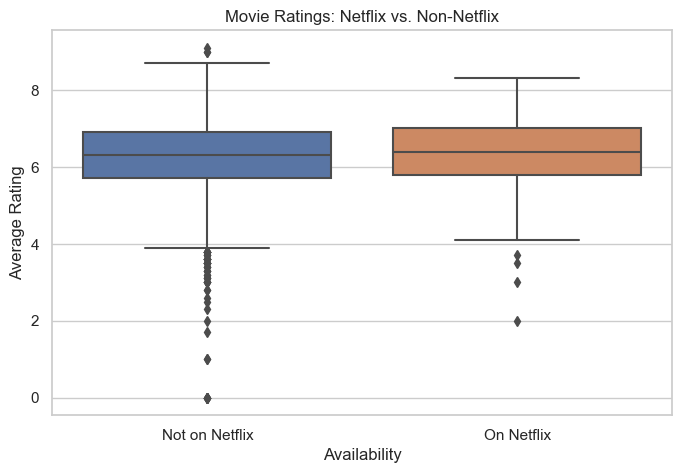

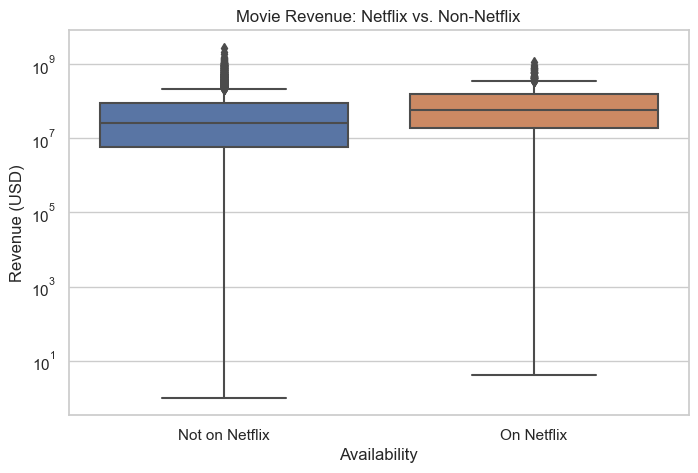

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Ratings comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x='on_netflix', y='vote_average', data=merged_df)
plt.xticks([0, 1], ['Not on Netflix', 'On Netflix'])
plt.title("Movie Ratings: Netflix vs. Non-Netflix")
plt.xlabel("Availability")
plt.ylabel("Average Rating")
plt.show()

# Revenue comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x='on_netflix', y='revenue', data=merged_df)
plt.xticks([0, 1], ['Not on Netflix', 'On Netflix'])
plt.title("Movie Revenue: Netflix vs. Non-Netflix")
plt.xlabel("Availability")
plt.ylabel("Revenue (USD)")
plt.yscale("log")  # Revenue varies widely, use log scale
plt.show()


### Distribution of Ratings: Netflix vs. Non-Netflix

This plot shows the distribution of movie ratings (vote averages) for movies on and off Netflix. Both distributions appear somewhat similar, but Netflix movies tend to cluster more tightly around the mid-range (6–7). Non-Netflix movies show a slightly wider spread with more very low or very high-rated films. This suggests that Netflix might focus on more consistently rated titles, avoiding extremes.


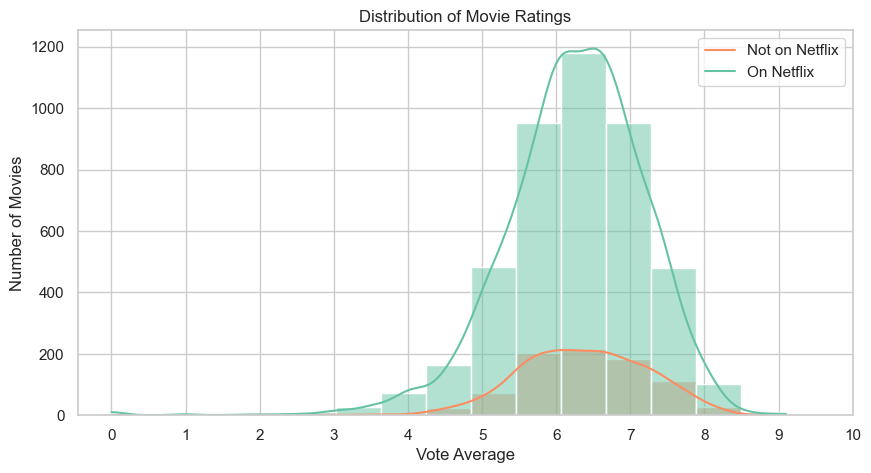

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(data=merged_df, x='vote_average', hue='on_netflix', bins=15, kde=True, palette='Set2')
plt.xticks(range(0, 11))
plt.title('Distribution of Movie Ratings')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.legend(labels=['Not on Netflix', 'On Netflix'])
plt.show()


### Revenue vs. Rating Scatter Plot

This scatter plot compares movie ratings to their global revenue, with a distinction between Netflix and non-Netflix movies. As expected, higher-rated movies sometimes earn more, though the relationship is not strictly linear. Most Netflix movies cluster around lower revenues, while many top-grossing titles are not available on Netflix. This supports the idea that Netflix may focus more on accessibility and variety than blockbuster hits.


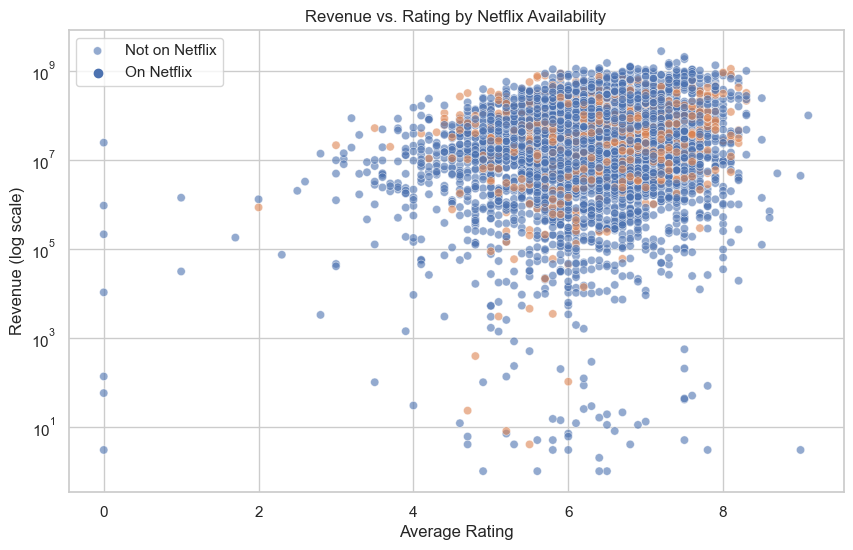

In [111]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='vote_average', y='revenue', hue='on_netflix', alpha=0.6)
plt.yscale('log')
plt.title('Revenue vs. Rating by Netflix Availability')
plt.xlabel('Average Rating')
plt.ylabel('Revenue (log scale)')
plt.legend(labels=['Not on Netflix', 'On Netflix'])
plt.show()


### Movie Release Trends Over Time

This count plot shows how many movies were released each year, separated by whether they are available on Netflix. Most Netflix movies are from recent years, especially post-2010, which reflects Netflix’s preference for hosting modern content. Older movies dominate the non-Netflix category, showing a more even spread across decades. This may suggest that Netflix prioritizes current or trending titles in its catalog.


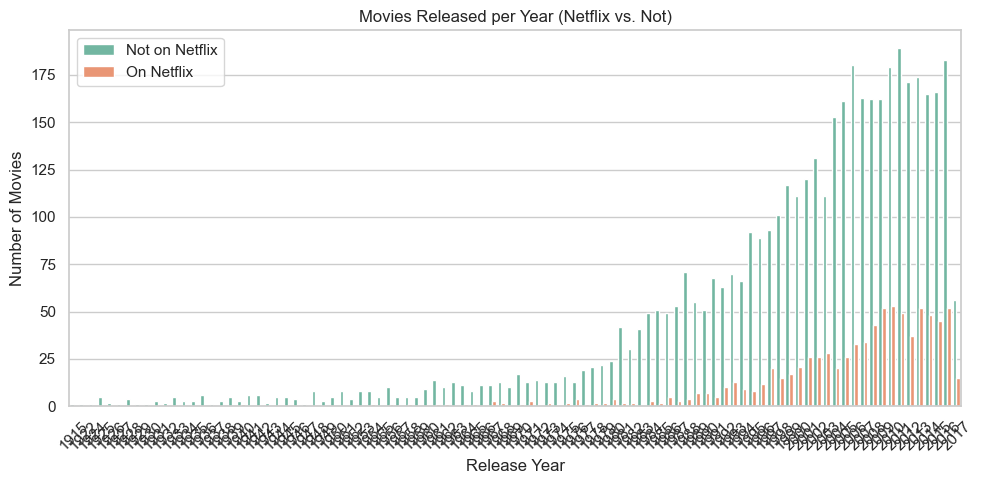

In [112]:
merged_df['release_year'] = pd.to_datetime(merged_df['release_date']).dt.year

plt.figure(figsize=(10,5))
sns.countplot(data=merged_df, x='release_year', hue='on_netflix', palette='Set2')
plt.xticks(rotation=45)
plt.title('Movies Released per Year (Netflix vs. Not)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(labels=['Not on Netflix', 'On Netflix'])
plt.tight_layout()
plt.show()


### Top Genres Comparison: Netflix vs. Non-Netflix

This bar chart displays the most common genres across both groups of movies. Some genres like drama, comedy, and action appear in both groups, but their frequencies differ. For example, documentaries and family-oriented content appear more often on Netflix, while thrillers and historical genres are more common in the wider movie dataset. This shows that Netflix has a unique genre preference that may cater to specific viewer interests or global markets.


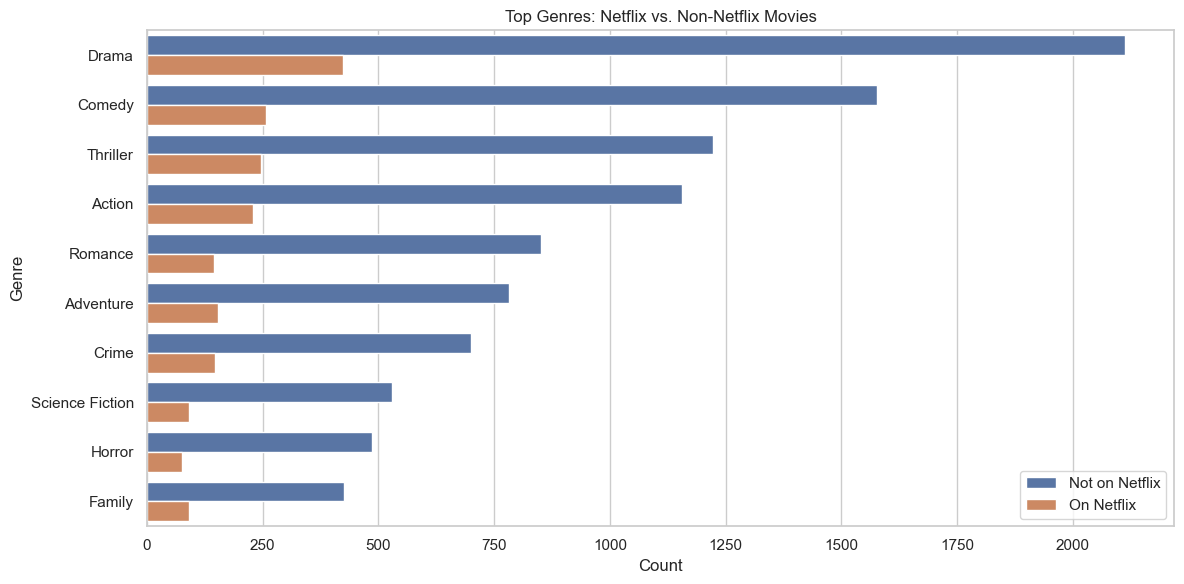

In [113]:
# Create a separate dataframe with genre and Netflix flag
genre_df = merged_df.copy()
genre_df['genres_cleaned'] = genre_df['genres_cleaned'].fillna('Unknown')

# Expand multiple genres into rows
genre_exploded = genre_df.assign(genre=genre_df['genres_cleaned'].str.split(', ')).explode('genre')

# Plot top genres
plt.figure(figsize=(12,6))
sns.countplot(data=genre_exploded, y='genre', hue='on_netflix', order=genre_exploded['genre'].value_counts().index[:10])
plt.title('Top Genres: Netflix vs. Non-Netflix Movies')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend(labels=['Not on Netflix', 'On Netflix'])
plt.tight_layout()
plt.show()


### Insights and Interpretation:

- **Ratings:** The ratings distribution shows that both Netflix and non-Netflix movies are rated similarly overall. However, Netflix movies tend to cluster within a narrower mid-range, while non-Netflix movies display slightly more extremes in ratings.

- **Revenue:** The boxplot and scatter plot reveal that movies not available on Netflix have a broader and significantly higher revenue range. Most Netflix titles generate modest revenue, suggesting that Netflix may not prioritize blockbuster content.

- **Genres and Release Trends:** Netflix movies are heavily represented in recent years (post-2010), indicating a focus on newer content. Genre analysis shows Netflix has more dramas and documentaries, while non-Netflix content includes more traditional big-budget genres like action and adventure.

These insights suggest Netflix's content strategy leans toward accessible, consistent-quality content with moderate budgets, rather than top-grossing, high-risk releases.


## Conclusion

In this project, I investigated whether movies available on Netflix differ in popularity and financial success from those not available on the platform. I gathered two related movie datasets using two different gathering methods: the Movies Dataset via the Kaggle API and the Netflix Dataset via manual download.

After assessing and cleaning both datasets, I merged them by title and added a flag for Netflix availability. I used `.info()` and `.isnull().sum()` to identify quality issues, then resolved missing values, formatted nested JSON structures, filtered data types, and ensured the datasets were tidy and analyzable.

My analysis showed:
- Netflix movies have comparable user ratings to non-Netflix movies, but with less variance.
- Non-Netflix movies have significantly higher and more diverse revenue outcomes.
- Netflix favors recent releases and certain genres (e.g., drama, documentary).

These patterns reflect Netflix's preference for consistent-performing, newer content rather than box office hits.


## Reflection

If I had more time or resources, I would:
- Integrate additional features like user review counts, IMDb ratings, or viewer watch time for deeper popularity insights.
- Apply fuzzy string matching to improve merging accuracy and reduce unmatched but identical titles (due to spacing or casing issues).
- Conduct a time-series analysis to understand how Netflix’s strategy evolved year over year in terms of genre, country, and budget focus.

This project helped me apply end-to-end data wrangling — from data collection using APIs and manual methods to cleaning messy formats, combining datasets, visualizing patterns, and drawing data-driven conclusions.
